In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
from scipy.stats import norm
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline
    
data_train = pd.read_csv("Bengaluru_House_Data.csv",na_values=['?',''],delimiter=',',delim_whitespace=False) # reading data from files


print(data_train.shape)

#print(data_test.shape)

(13320, 9)


In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
data_train.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [4]:
#data_train = data_train.fillna({'society': 'unknown',
   #                'balcony': 0, 'bath': 0,
  #                 'size': 'unknown', 'location': 'unknown'})

In [5]:
data_train = data_train.dropna(subset = ['size','bath','balcony','location'])

In [6]:
data_train = data_train.fillna({'society': 'None'})

In [7]:
data_train.shape

(12710, 9)

In [8]:
object_data_train=data_train.select_dtypes(include =['object'])
for i in object_data_train:
    print(i,data_train[i].unique(),"\t",len(data_train[i].unique()),"\n")

area_type ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 	 4 

availability ['19-Dec' 'Ready To Move' '18-Feb' '18-Nov' '18-May' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep'
 '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan' '18-Aug' '19-Jan'
 '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep' '17-May' '17-Jun'
 '18-Oct' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun' '22-Jun'
 '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb' '21-Oct'
 '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov' '21-Mar'
 '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov' '16-Jul'
 '15-Jun' '20-Nov' '20-Jul' '16-Sep' '20-Feb' '15-Dec' '16-Oct' '22-Nov'
 '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan' '17-Feb' '14-Jul'] 	 78 

location ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout'] 	 1265 

si

In [9]:
def change_to_float(area_size):
    if isinstance(area_size, str):
        area_size = area_size.split('Sq.')[0]
        area_size = area_size.split('Perch')[0]
        area_size = area_size.split('Acres')[0]
        area_size = area_size.split('Guntha')[0]
        area_size = area_size.split('Grounds')[0]
        area_size = area_size.split('Cents')[0]
        area_size = area_size.split('-')
        area_size = list(map(float,area_size))
        area_size = sum(area_size)  / len(area_size)
    return area_size


In [10]:
data_train['total_sqft'] = data_train['total_sqft'].apply(lambda x : change_to_float(x))

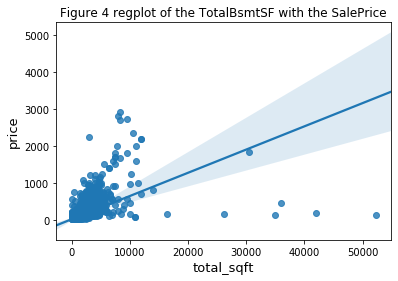

In [11]:
ax = sns.regplot(x=data_train['total_sqft'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)
plt.xlabel('total_sqft', fontsize= 13)
plt.title('Figure 4 regplot of the TotalBsmtSF with the SalePrice', fontsize= 12);
plt.show()

In [12]:
g_out = data_train.sort_values(by="total_sqft", ascending = False).head(2)
g_out

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1894,Plot Area,Ready To Move,Nelamangala,3 Bedroom,None,52272.0,2.0,1.0,140.0
5393,Super built-up Area,Ready To Move,Doddabommasandra,9 BHK,None,42000.0,8.0,3.0,175.0


In [13]:
data_train.drop([1894,5393,5469,674], inplace = True)


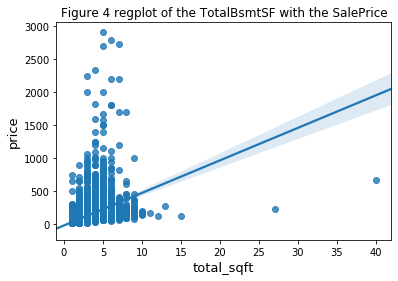

In [14]:
ax = sns.regplot(x=data_train['bath'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)
plt.xlabel('total_sqft', fontsize= 13)
plt.title('Figure 4 regplot of the TotalBsmtSF with the SalePrice', fontsize= 12);
plt.show()

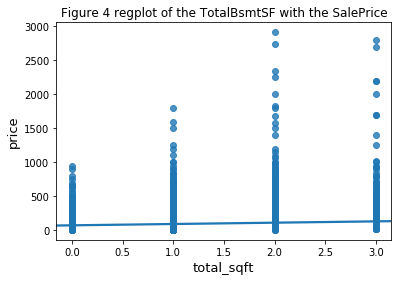

In [15]:
ax = sns.regplot(x=data_train['balcony'], y=data_train['price'])
plt.ylabel('price', fontsize= 13)

plt.xlabel('total_sqft', fontsize= 13)
plt.title('Figure 4 regplot of the TotalBsmtSF with the SalePrice', fontsize= 12);
plt.show()

In [16]:
print(data_train['size'].unique())
len(data_train['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '3 Bedroom' '1 BHK' '1 RK' '4 BHK'
 '1 Bedroom' '2 Bedroom' '6 Bedroom' '8 Bedroom' '7 Bedroom' '5 BHK'
 '7 BHK' '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK'
 '11 Bedroom' '43 Bedroom' '14 BHK' '8 BHK' '12 Bedroom' '10 Bedroom'
 '13 BHK']


27

In [17]:
size_mode = data_train['size'].mode()[0]
data_train.loc[data_train['size'].isna(), 'size'] = size_mode


In [18]:
data_train['size'] = data_train['size'].apply(lambda x: x.split(' ')[0])

In [19]:
print(data_train['size'].unique())
len(data_train['size'].unique())

['2' '4' '3' '1' '6' '8' '7' '5' '11' '9' '27' '43' '14' '12' '10' '13']


16

In [20]:
x_train_data = data_train[['size', 'total_sqft', 'bath', 'balcony']]
y_train_data = data_train['price']

In [21]:
x_train_data.shape

(12706, 4)

In [22]:
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn import preprocessing


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn   import metrics
from sklearn.model_selection import train_test_split


print("Linear Regression \n")

x_train = x_train_data.copy()
y_train = y_train_data.copy()

#Cross validation
classifierLinearRegression = LinearRegression(fit_intercept=True, normalize=False,
                                              copy_X=True, n_jobs=1)
kf = KFold(5, random_state=7, shuffle=True)    
cv_y = []
cv_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1    
    pred = []    
    
    scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
    x_train_fold = scaler.fit_transform(x_train)
    x_test_fold = scaler.transform(x_train)

    y_train_fold = y_train
    y_test_fold = y_train
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    cv_y.append(y_test_fold)
    cv_pred.append(pred)        

    
#Calculating the error.
cv_y = np.concatenate(cv_y)
cv_pred = np.concatenate(cv_pred)
score = np.sqrt(metrics.mean_squared_error(cv_y,cv_pred))
print("\n Average RMSE: {}".format(score))    
r2 = metrics.r2_score(cv_y,cv_pred)
print("\n R2 error: {}".format(r2))

#RMSE['LinearRegression'] = score
#R2['LinearRegression'] = r2

#RMSE['LinearRegression'] 

Linear Regression 


 Average RMSE: 92.73535985828345

 R2 error: 0.5045195049608997
